<h3>Les indicateurs de Population Etudiante</h3>
<p>Suite de notre étude pour sélectionner les pays à potentiel.</p>
<p>L'objectif est d'étudier les <b>indicateurs de population étudiante</b>.<br \>
La population étudiante de chaque pays représente les futurs clients potentiels pour notre projet.</p>

<p><u>Avant de commencer</u> :</p>
<p>
    <ol>
        <li>Importation des librairies nécessaires</li>        
        <li>Modification des paramètres par défaut de <i>Jupyter</i></li>
        <li>Importation du <i>DataFrame</i> '<b>dataPastBackup</b>' préparé précédemment via <i>Pickle</i></li>
        <li>Importation de la <i>Serie</i> '<b>listePaysITBackup</b>' contenant les <u><b>108</b> pays <br \>candidats</u> sélectionnés à partir de l'indicateur de connectivité à Internet '<b>IT.NET.USER.P2</b>'</li>
    </ol>
</p>

In [1]:
# Import des librairies Numpy et Pandas
import numpy as np
import pandas as pd
# Import des librairies Matplotlib et Seaborn
# pour la génération des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
# Import de Pickle pour la restauration des objets Python.
import pickle

In [2]:
# Modification des paramètres de Pandas pour 
# pouvoir afficher plus de lignes et plus de colonnes.
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns",100)

In [3]:
# Import du DF 'dataPastBackup', préparé précédemment, via Pickle dans le DF 'data'.
data = pickle.load(open('dataPastBackup', 'rb'))
data.tail()

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
886613,Zimbabwe,Sub-Saharan Africa,SL.UEM.TOTL.ZS,Social Protection & Labor: Unemployment,2016.0,5.20000
886922,Zimbabwe,Sub-Saharan Africa,UIS.LPP.AG15T24,Literacy,2014.0,35.88710
886923,Zimbabwe,Sub-Saharan Africa,UIS.LP.AG15T24,NaN,2014.0,311114.00000
886926,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.ZS,Literacy,2014.0,90.42812
886928,Zimbabwe,Sub-Saharan Africa,SE.ADT.1524.LT.FM.ZS,Literacy,2014.0,1.06389


<p>Import de la <i>Serie</i> '<b>listePaysITBackup</b>' préparé précédemment lors <br \>de l'analyse de l'indicateur de connectivité à Internet '<b>IT.NET.USER.P2</b>'</p>

In [4]:
listePaysCandidats = pickle.load(open('listePaysITBackup', 'rb'))
print('Liste des {} pays candidats importés:\n{}'.format(len(listePaysCandidats),listePaysCandidats))

Liste des 108 pays candidats importés:
96665                            Albania
107660                           Andorra
114990               Antigua and Barbuda
118655                         Argentina
122320                           Armenia
125985                             Aruba
129650                         Australia
133315                           Austria
136980                        Azerbaijan
140645                      Bahamas, The
144310                           Bahrain
151640                          Barbados
155305                           Belarus
158970                           Belgium
169965                           Bermuda
180960            Bosnia and Herzegovina
188290                            Brazil
195620                 Brunei Darussalam
199285                          Bulgaria
221275                            Canada
224940                    Cayman Islands
239600                             Chile
243265                             China
246930            

<h4>Data Cleaning du DF 'data':</h4>
<p>
    <ol>
        <li>Filtrage des pays candidats présélectionnés selon l'indicateur '<b>IT.NET.USER.P2</b>'</li>
        <li>Sélection des 'Indicator Code' potentiels</li>
        <li>Suppression des colonnes inutiles</li>
    </ol>
</p>

<h5>Filtrage des pays candidats présélectionnés selon l'indicateur 'IT.NET.USER.P2'</h5>

In [5]:
data = data[data['Country Name'].isin(listePaysCandidats)]

<p>J'ai présélectionné les 40 indicateurs ci-dessous sur la base de leur définition : </p>

In [6]:
listeIndic = np.array(['BAR.POP.1519','BAR.POP.15UP','BAR.POP.2024','BAR.POP.2529','BAR.POP.3034',
                      'BAR.SEC.ICMP.1519.ZS','BAR.SEC.ICMP.2024.ZS','BAR.SEC.ICMP.2529.ZS',
                      'BAR.SEC.ICMP.25UP.ZS','BAR.SEC.ICMP.3034.ZS','BAR.SEC.ICMP.3539.ZS',
                      'BAR.TER.ICMP.1519.ZS','BAR.TER.ICMP.15UP.ZS','BAR.TER.ICMP.2024.ZS',
                      'BAR.TER.ICMP.2529.ZS','BAR.TER.ICMP.25UP.ZS','BAR.TER.ICMP.3034.ZS',
                      'SE.ENR.TERT.FM.ZS','SE.SEC.ENRL','SE.SEC.ENRL.GC','SE.SEC.ENRR.UP',
                      'SE.TER.ENRL','SE.TOT.ENRR','SP.POP.1524.TO.UN','SP.POP.AG20.TO.UN',
                      'SP.POP.AG25.TO.UN','SP.POP.TOTL','SP.SEC.UTOT.IN','UIS.E.3',
                      'UIS.E.3.GPV','UIS.E.4.PR','UIS.EA.3.AG25T99','UIS.EA.3T6.AG25T99',
                      'UIS.GER.123','UIS.GER.4','UIS.NER.3','UIS.NERA.3','UIS.TE_100000.56',
                      'SE.TER.GRAD','UIS.E.4'
])
len(listeIndic)

40

<p>Je filtre mon DF sur ces 40 '<b>Indicator Code</b>' : </p>

In [7]:
data = data[data['Indicator Code'].isin(listeIndic)]

<p><u>Moyennes</u> des '<b>Taux de remplissage</b>' et <br \><u>moyennes</u> des '<b>Année Dernière Valeur Non Null</b>', 
    <br \><u>regroupés par</u> '<b>Indicator Code</b>' et<br \>
    <u>trié par</u> '<b>Taux de 'NaN</b>' en ordre ascendant.</p>

In [8]:
(data[['Indicator Code','Dernière Valeur Non Null']]\
      .groupby('Indicator Code').count()\
      .rename(columns={'Dernière Valeur Non Null':'Taux de \'NaN\''})/len(data))\
      .merge(data[['Indicator Code','Année Dernière Valeur Non Null']]\
             .groupby('Indicator Code').mean().round(2),
             how='left', 
             left_on='Indicator Code', 
             right_on='Indicator Code')\
      .sort_values(by='Taux de \'NaN\'', ascending=True)

,Taux de 'NaN',Année Dernière Valeur Non Null
Indicator Code,,
UIS.E.4.PR,0.014352,2012.47
UIS.GER.4,0.017824,2012.14
BAR.POP.1519,0.018287,2010.00
BAR.TER.ICMP.3034.ZS,0.018287,2010.00
BAR.TER.ICMP.25UP.ZS,0.018287,2010.00
BAR.TER.ICMP.2529.ZS,0.018287,2010.00
BAR.TER.ICMP.2024.ZS,0.018287,2010.00
BAR.TER.ICMP.1519.ZS,0.018287,2010.00
BAR.SEC.ICMP.3539.ZS,0.018287,2010.00


<p>Les <b>40</b> '<b>Indicator Code</b>' ont tous un '<b>taux de NaN</b>' <u>très faible</u> (entre 1.4% et 2.5%)<br \>
    avec des dernières valeurs s'étalant de <b>2010 à 2016</b>.<br \>
    <i>Les indicateurs de Barro-Lee ne sont renseignés que tous les 5 ans<br \> 
        et leurs dernières dates renseignées dans ce jeu de donnée est l'année 2010</i>.</p>
<p><u>En me basant sur leurs définitions respectives, <br \>je choisi de retenir les indicateurs</u> :
    <ul>
        <li>'<b>UIS.E.3</b>' 
            <ul>
                <li>représente le nombre d'inscriptions dans l'enseignement <br \>
                    secondaire supérieur, pour les deux sexes</li>
            </ul>
        </li>
        <li>'<b>SE.TER.ENRL</b>' 
            <ul>
                <li>représente le nombre d'inscriptions dans l'enseignement <br \>
                    supérieur, tous programmes confondus, pour les deux sexes</li>
            </ul>
    </ul>
</p>

<p>Je filtre mon DF avec les indicateurs '<b>UIS.E.3</b>' et '<b>SE.TER.ENRL</b>' :</p>

In [9]:
data = data[data['Indicator Code'].isin(['UIS.E.3','SE.TER.ENRL'])]

<p>Liste des pays qui ont des valeurs null pour au moins l'un des 2 indicateurs:</p>

In [10]:
data[data['Dernière Valeur Non Null'].isnull()]

,Country Name,Region,Indicator Code,Topic,Année Dernière Valeur Non Null,Dernière Valeur Non Null
327389,Faroe Islands,Europe & Central Asia,SE.TER.ENRL,Tertiary,NaN,NaN
327399,Faroe Islands,Europe & Central Asia,UIS.E.3,Secondary,NaN,NaN
342059,French Polynesia,East Asia & Pacific,UIS.E.3,Secondary,NaN,NaN
371369,Greenland,Europe & Central Asia,SE.TER.ENRL,Tertiary,NaN,NaN
371379,Greenland,Europe & Central Asia,UIS.E.3,Secondary,NaN,NaN
378709,Guam,East Asia & Pacific,UIS.E.3,Secondary,NaN,NaN
569279,Monaco,Europe & Central Asia,SE.TER.ENRL,Tertiary,NaN,NaN
605939,New Caledonia,East Asia & Pacific,UIS.E.3,Secondary,NaN,NaN
869819,Virgin Islands (U.S.),Latin America & Caribbean,UIS.E.3,Secondary,NaN,NaN


<p><u>Les pays concernés</u> ont très </u>peu de potentiel</u> et <u>n'impacte pas</u> notre étude.<br \>
<b>Ils peuvent être ignorés</b>.<br \>
A noter que les pays '<b>Faroe Islands</b>' et '<b>Greenland</b>' ne seront pas <br \>
conservés lors du passage en <i>Table de Pivot</i> car leur valeur, pour <br \>
les <b>2</b> <i>'Indicator Code'</i>, <u>sont null</u>.</p>
<p>Notre sélection comportera dorénavant <u><b>106 pays</b> candidats</u>.</p>

<h5>Suppression des colonnes inutiles</h5>
<p>Pour la suite de l'analyse, je ne conserve que les colonnes utiles.</p>
<p><u>Je supprime les colonnes</u> :
    <ul>
        <li>'Topic'</li>
        <li>'Année Dernière Valeur Non Null'</li>
    </ul>
</p>

In [11]:
data = data.drop(columns=['Topic','Année Dernière Valeur Non Null'])
data.head()

,Country Name,Region,Indicator Code,Dernière Valeur Non Null
96494,Albania,Europe & Central Asia,SE.TER.ENRL,160527.0
96504,Albania,Europe & Central Asia,UIS.E.3,151937.0
107489,Andorra,Europe & Central Asia,SE.TER.ENRL,501.0
107499,Andorra,Europe & Central Asia,UIS.E.3,1288.0
114819,Antigua and Barbuda,Latin America & Caribbean,SE.TER.ENRL,1792.0


<h4>Feature Modeling du DF 'data':</h4>
<p>
    <ol>
        <li>Passage du DF '<b>data</b>' en table de pivot</li>
        <li>Création d'une nouvelle colonne 'popTotalEtudiant' <br \>qui sera l'addition des 2 indicateurs '<b>UIS.E.3</b>' et '<b>SE.TER.ENRL</b>' <br \>et qui représentera <u>la somme des étudiants inscrits <br \>dans le <b>secondaire supérieur</b> et dans le <b>tertiaire</b></u>.</li>
    </ol>
</p>

<h5>Passage du DF 'data' en table de pivot</h5>

In [12]:
# Afin que 'Country Name' soit considéré comme une colonne, j'effectue un reset_index().
dataPivot = data.pivot_table('Dernière Valeur Non Null',index=['Country Name','Region'], 
            columns='Indicator Code').reset_index()
# Je remplace les valeurs 'NaN' par des 0 pour que l'addition des deux colonnes 
# ne donne pas 'NaN' si l'une des deux valeurs vaut 'NaN'.
dataPivot.fillna(0, inplace=True)
dataPivot.head()

Indicator Code,Country Name,Region,SE.TER.ENRL,UIS.E.3
0,Albania,Europe & Central Asia,160527.0,151937.0
1,Andorra,Europe & Central Asia,501.0,1288.0
2,Antigua and Barbuda,Latin America & Caribbean,1792.0,2615.0
3,Argentina,Latin America & Caribbean,2869450.0,1722700.0
4,Armenia,Europe & Central Asia,107665.0,103385.0


<h5>Création de la colonne 'popTotalEtudiant', addition des 2 indicateurs 'UIS.E.3' et 'SE.TER.ENRL'</h5>

In [13]:
dataPivot['popTotalEtudiant'] = dataPivot.apply(lambda row: row['SE.TER.ENRL'] + row['UIS.E.3'], axis=1)

<p>Tri du DF '<b>dataPivot</b>' selon la colonne '<b>popTotalEtudiant</b>' classé par <u>ordre décroissant</u>,<br \>
    et <u>affichage des <b>10</b> première valeurs</u>.</p>

In [14]:
dataPivot = dataPivot.sort_values(by='popTotalEtudiant', ascending=False)
dataPivot.head(10)

Indicator Code,Country Name,Region,SE.TER.ENRL,UIS.E.3,popTotalEtudiant
22,China,East Asia & Pacific,43367392.00,43709224.00,87076616.00
101,United States,North America,19531728.00,11736315.00,31268043.00
16,Brazil,Latin America & Caribbean,8285475.00,9949583.00,18235058.00
97,Turkey,Europe & Central Asia,6062886.00,4995623.00,11058509.00
82,Russian Federation,Europe & Central Asia,6592416.00,2823004.00,9415420.00
44,"Iran, Islamic Rep.",Middle East & North Africa,4802721.00,3691835.00,8494556.00
64,Mexico,Latin America & Caribbean,3419391.00,4682336.00,8101727.00
48,Japan,East Asia & Pacific,3862460.00,3682920.00,7545380.00
100,United Kingdom,Europe & Central Asia,2352932.75,4195081.50,6548014.25
37,Germany,Europe & Central Asia,2977781.00,2579952.25,5557733.25


<p>Je sauvegarde les colonnes '<b>Country Name</b>' et '<b>popTotalEtudiant</b>' du DataFrame '<b>dataPivot</b>'<br \>
    dans un nouveau DataFrame via <b>Pickle</b> pour l'utiliser dans la suite de notre analyse.</p>

In [15]:
pickle.dump(dataPivot.drop(columns=['Region','SE.TER.ENRL','UIS.E.3']), open('dataPivotPopBackup', 'wb'))

<h4>Data Visualisation</h4>
<p>Mise en graphique des informations récoltées :
    <ol>
        <li><u>Graphique en bar</u> représentant les <b>106 pays</b> en fonction de leur <b>population <br \>totale étudiante</b> <i>(secondaire supérieur et tertiaire)</i>.<br \>
            <b>Echelle logarithmique</b> sur <u>l'axe des abscisses</u></li>
        <li><u>Graphique en boite à moustache</u> représentant les <b>régions</b> du monde en <br \>fonction de la <b>population totale étudiante</b> (<i>secondaire supérieur et tertiaire)</i> <br \>de chaque Pays.<br \>
            '<b>Region</b>' trié par <u>médiane</u> en ordre <u>décroissant</u>.<br \>
            <b>Echelle logarithmique</b> sur <u>l'axe des abscisses</u></li>
    </ol>
</p>

<h4>Graphique en bar :</h4>

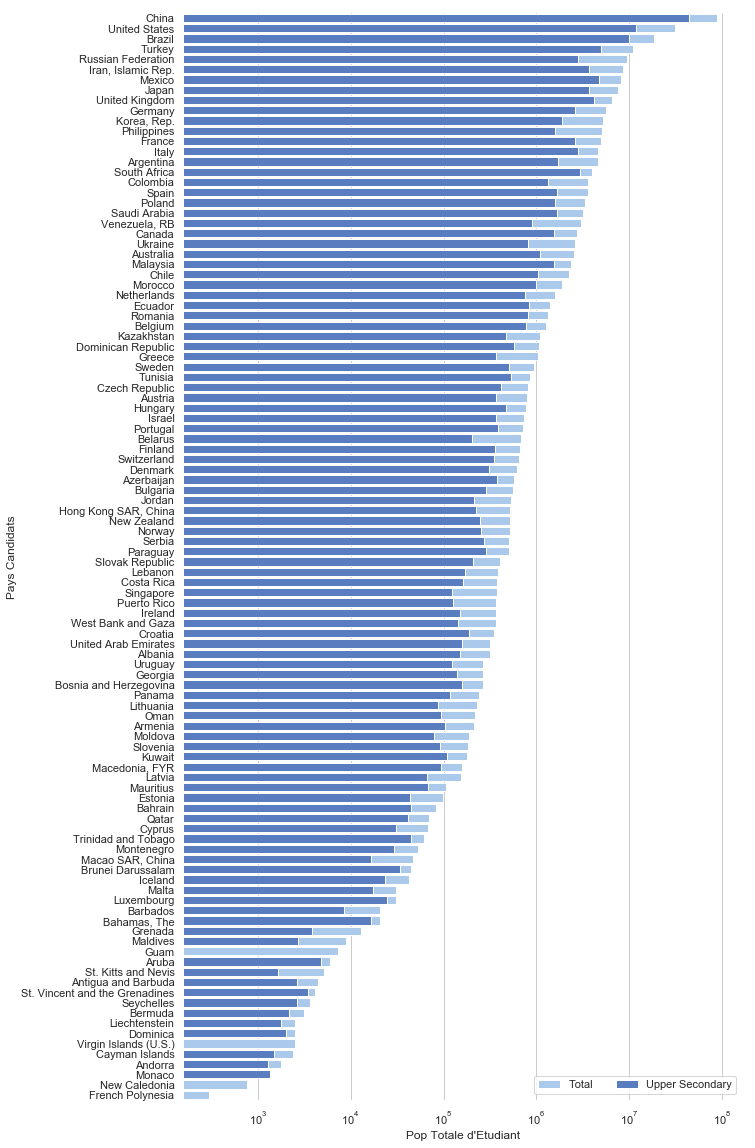

In [16]:
sns.set(style="whitegrid")

# Initialisation de la figure matplotlib
f, ax = plt.subplots(figsize=(10, 20))

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary' + 'Tertiary') 
# en bleu clair.
sns.set_color_codes("pastel")
sns.barplot(
    x="popTotalEtudiant", 
    y="Country Name", 
    data=dataPivot,
    label="Total", 
    color="b"
)

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary') 
# en bleu foncé.
sns.set_color_codes("muted")
sns.barplot(
    x="UIS.E.3", 
    y="Country Name", 
    data=dataPivot, 
    label="Upper Secondary", 
    color="b"
)

# Ajout de la légende sur 2 colonnes
ax.legend(ncol=2, loc="lower right", frameon=True)
# Délimitation de l'axe des abscisses et nommage des labels des axes
ax.set(
    ylabel="Pays Candidats",
    xlabel="Pop Totale d'Etudiant")
# Passage de l'axe des abscisse en echelle logarithmique
ax.set_xscale('log')
# Suppression de la barre de délimitation du graphique sur les parties gauche et basse.
sns.despine(left=True, bottom=True)

<h4>Graphique en boite à moustache :</h4>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text yticklabel objects>)

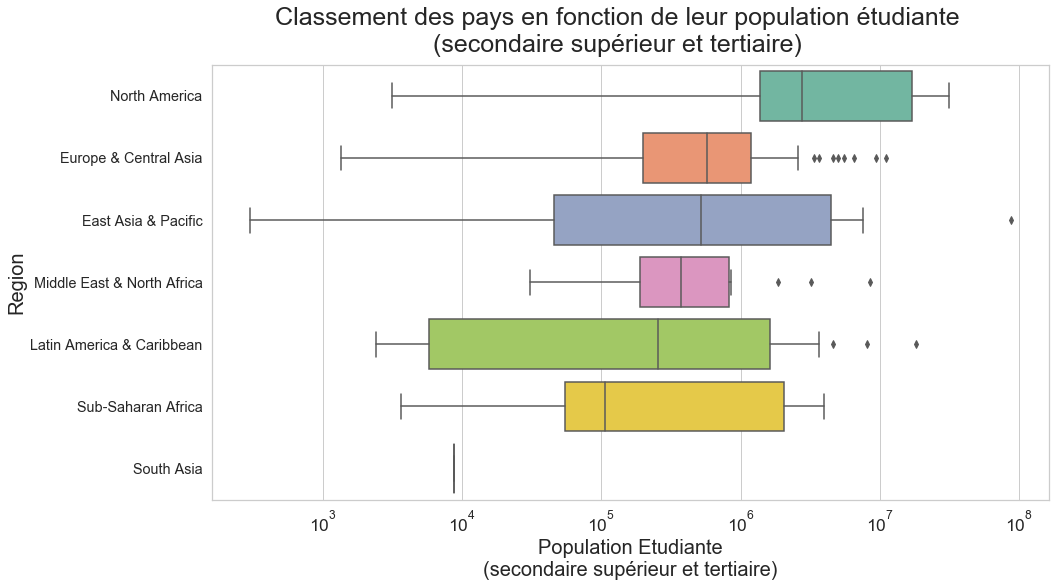

In [17]:
fig = plt.figure(figsize=(15,8))
fig.suptitle('Classement des pays en fonction de leur population étudiante\n(secondaire supérieur et tertiaire)', fontsize=25)

chart = sns.boxplot(
    data=dataPivot,
    x="popTotalEtudiant",
    y='Region',
    palette='Set2',
    order=dataPivot.groupby('Region').median().sort_values(by="popTotalEtudiant", ascending=False).index
)

chart.set_xlabel('Population Etudiante\n(secondaire supérieur et tertiaire)',fontsize = 20) #xlabel
chart.set_ylabel('Region', fontsize = 20)#ylabel

chart.set_xscale('log')

plt.xticks(
#     rotation=45, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='x-large'  
)

plt.yticks(
    fontweight='light',
    fontsize='large'
)

<p>Globalement, les pays des différentes régions du monde présentent de grandes disparités.</p>
<p>Cependant, les 3 régions supérieures que sont '<b>North America</b>', '<b>Europe & Central Asia</b>' <br \>
    ainsi que '<b>East Asia & Pacific</b>' regroupe majoritairement les pays ayant le plus d'étudiant <br \>
    inscrits en <u>secondaire supérieur</u> et en <u>tertiaire</u>.</p>
<p>Quelques pays des régions '<b>Middle East & North Africa</b>' et '<b>Latin America & Caribbean</b>' <br \>
    se démarquent par leur nombre d'étudiants élevé.</p>

<p>Suite à l'analyse des données du <u>graphique en bar</u> et à l'analyse des <u>pays à faible nombre <br \>d'étudiants</u> inscrits dans le secondaire supérieur et le tertiaire, <br \>
    je décide de <u>retenir</u>, pour la phase finale de mon analyse, <u>les pays qui ont une <b>Population <br \>Etudiante (2nd Sup + Ter.) supérieure à 500 000</b></u>.</p>

<p>Nombre de pays sélectionnés de cette manière :</p>

In [18]:
print('{} pays séléctionnés'.format(len(dataPivot[dataPivot['popTotalEtudiant'] > 550000])))

47 pays séléctionnés


<p>Je sauvegarde la valeur de l'indice minimal retenu dans un fichier via <b>Pickle</b> 
    pour l'utiliser dans la phase finale de mon analyse.</p>

In [19]:
pickle.dump(500000, open('indicePopMinBackup', 'wb'))

<h4>Graphique en bar avec popTotalEtudiant > 500000 :</h4>

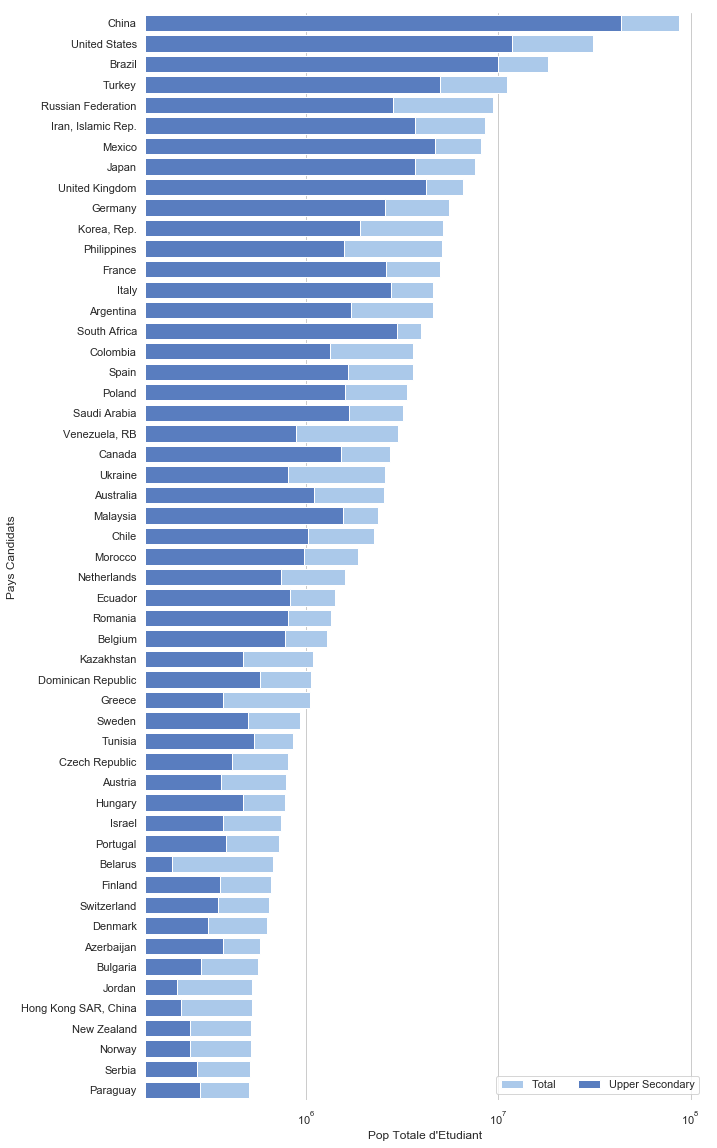

In [20]:
sns.set(style="whitegrid")

# Initialisation de la figure matplotlib
f, ax = plt.subplots(figsize=(10, 20))

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary' + 'Tertiary') 
# en bleu clair.
sns.set_color_codes("pastel")
sns.barplot(
    x="popTotalEtudiant", 
    y="Country Name", 
    data=dataPivot[dataPivot['popTotalEtudiant']>500000],
    label="Total", 
    color="b"
)

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary') 
# en bleu foncé.
sns.set_color_codes("muted")
sns.barplot(
    x="UIS.E.3", 
    y="Country Name", 
    data=dataPivot[dataPivot['popTotalEtudiant']>500000], 
    label="Upper Secondary", 
    color="b"
)

# Ajout de la légende sur 2 colonnes
ax.legend(ncol=2, loc="lower right", frameon=True)
# Délimitation de l'axe des abscisses et nommage des labels des axes
ax.set(
    ylabel="Pays Candidats",
    xlabel="Pop Totale d'Etudiant")
# Passage de l'axe des abscisse en echelle logarithmique
ax.set_xscale('log')
# Suppression de la barre de délimitation du graphique sur les parties gauche et basse.
sns.despine(left=True, bottom=True)

<h4>Graphique en bar des 20 pays ayant la plus importantes population étudiantevec popTotalEtudiant > 500000 :</h4>

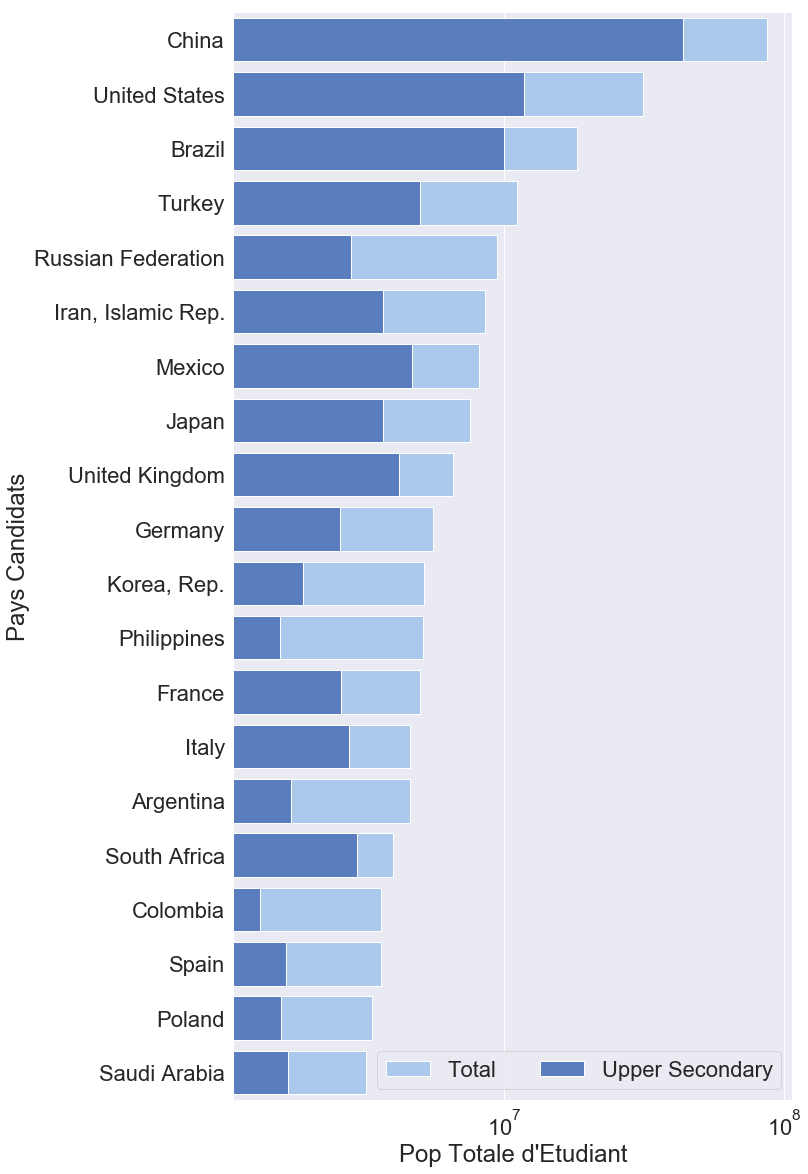

In [27]:
sns.set(style="whitegrid")
sns.set(font_scale=2)

# Initialisation de la figure matplotlib
f, ax = plt.subplots(figsize=(10, 20))

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary' + 'Tertiary') 
# en bleu clair.
sns.set_color_codes("pastel")
sns.barplot(
    x="popTotalEtudiant", 
    y="Country Name", 
    data=dataPivot.nlargest(20,'popTotalEtudiant'),
    label="Total", 
    color="b"
)

# Affichage du nombre total d'étudiant 
# (inscrits en 'Upper Secondary') 
# en bleu foncé.
sns.set_color_codes("muted")
sns.barplot(
    x="UIS.E.3", 
    y="Country Name", 
    data=dataPivot.nlargest(20,'popTotalEtudiant'), 
    label="Upper Secondary", 
    color="b"
)

# Ajout de la légende sur 2 colonnes
ax.legend(ncol=2, loc="lower right", frameon=True)
# Délimitation de l'axe des abscisses et nommage des labels des axes
ax.set(
    ylabel="Pays Candidats",
    xlabel="Pop Totale d'Etudiant")
# Passage de l'axe des abscisse en echelle logarithmique
ax.set_xscale('log')
# Suppression de la barre de délimitation du graphique sur les parties gauche et basse.
sns.despine(left=True, bottom=True)

<p>Fin de l'analyse des indicateurs de <b>population d'étudiants</b></p>